In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset/customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df['InternetService'] = df['InternetService'].fillna("")

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [8]:
numeric_columns = df.select_dtypes(include=["number"])

In [9]:
numeric_columns.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


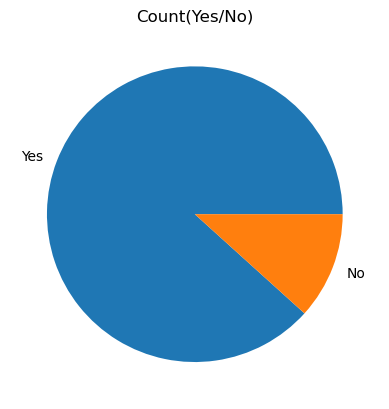

In [10]:
df['Churn'].value_counts().plot(kind="pie");
plt.title("Count(Yes/No)");
plt.ylabel("");
plt.show();

In [11]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [12]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [13]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [14]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

Text(0, 0.5, 'Mean Price')

Text(0.5, 0, 'Contract Type')

Text(0.5, 1.0, 'Contract Type Average Price')

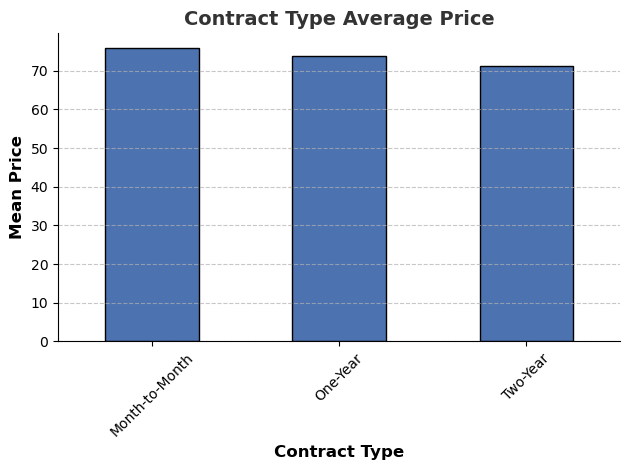

In [15]:
import matplotlib.pyplot as plt

# Plot with styling
ax = df.groupby("ContractType")["MonthlyCharges"].mean().plot(
    kind="bar",
    color="#4C72B0",  # custom bar color
    edgecolor='black',  # outline the bars
)

# Customizing the plot — like applying "CSS"
ax.set_ylabel("Mean Price", fontsize=12, fontweight='bold')
ax.set_xlabel("Contract Type", fontsize=12, fontweight='bold')
ax.set_title("Contract Type Average Price", fontsize=14, fontweight='bold', color="#333333")
ax.tick_params(axis='x', labelrotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()

(array([105.,  94., 105., 108.,  93., 104., 114.,  81., 108.,  88.]),
 array([ 30.   ,  38.996,  47.992,  56.988,  65.984,  74.98 ,  83.976,
         92.972, 101.968, 110.964, 119.96 ]),
 <BarContainer object of 10 artists>)

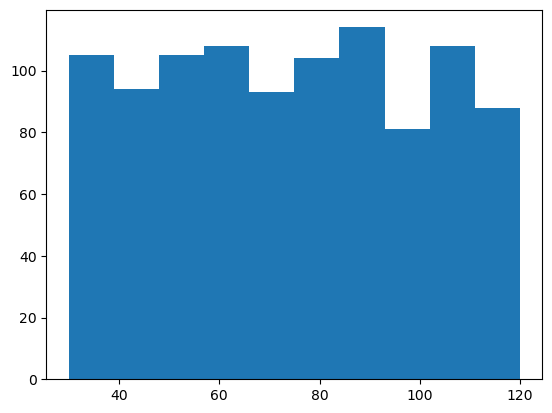

In [16]:
plt.hist(df['MonthlyCharges'])

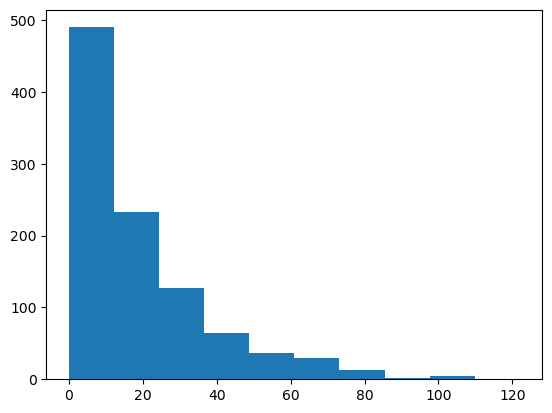

In [17]:
plt.hist(df['Tenure']);

In [18]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [19]:
y = df['Churn']
X = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [21]:
X.loc[:, 'Gender'] = X['Gender'].apply(lambda x: 1 if x == "Female" else 0)

In [22]:
type(X['Gender'][0])

numpy.int64

In [29]:
y = y.apply(lambda x: 1 if x == "Yes" else 0)

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [34]:
type(y[0])

numpy.int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
import  joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [42]:
X_test = scaler.fit_transform(X_test)

In [43]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print("Accuracy score on model is{}".format(accuracy_score(y_test, predictions)))

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_model = LogisticRegression()

In [50]:
log_model.fit(X_train, y_train) 

LogisticRegression()

In [51]:
log_model.predict([[40, 0, 20, 80]])

array([1], dtype=int64)

In [53]:
y_pred = log_model.predict(X_test)

In [55]:
modelperformance(y_pred)

Accuracy score on model is0.89
